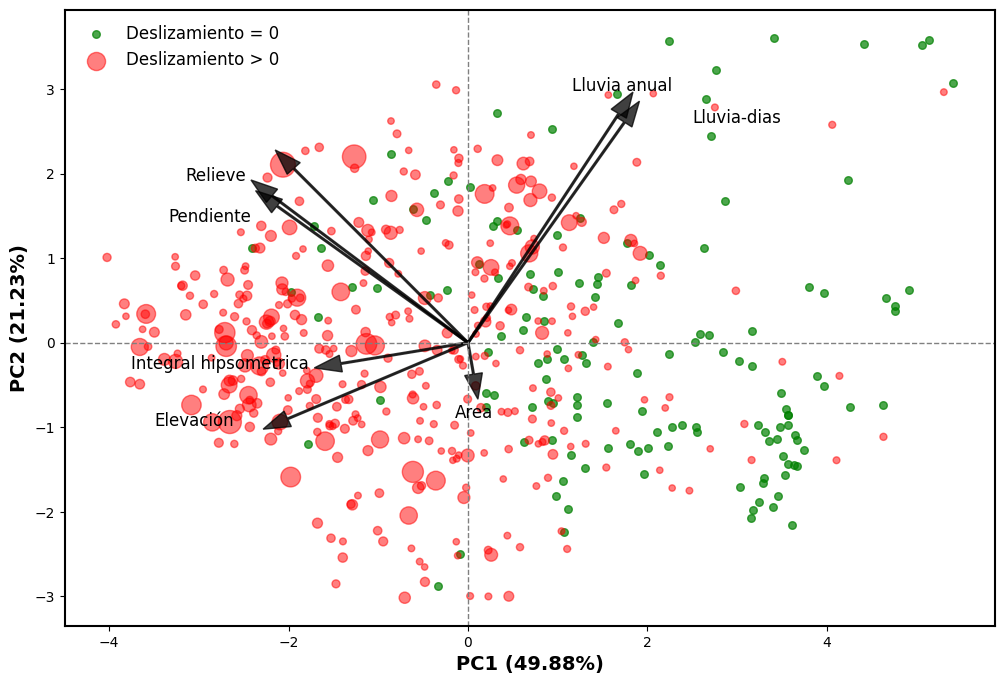

In [4]:
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the geopackage file into a GeoDataFrame
file_path = "G:/My Drive/INVESTIGACION/PAPERS/ELABORACION/Modelo_Multiniveles/DATA/df_catchments_spatial.gpkg"
gdf = gpd.read_file(file_path)

# Define the subset of variables to include in the PCA analysis
selected_columns_updated = ['area', 'hypso_inte', 'Densidad', 'rainfallAnnual_mean', 'elev_mean', 'slope_mean', 'rel_mean', 'RainfallDaysmean']

# Filter the data to include only the updated selected columns
data_subset_updated = gdf[selected_columns_updated]

# Standardize the updated selected data before applying PCA
scaler = StandardScaler()
data_scaled_subset_updated = scaler.fit_transform(data_subset_updated)

# Apply Principal Component Analysis (PCA) on the updated selected variables
pca_subset_updated = PCA(n_components=3)  # Extract 3 principal components for analysis
principal_components_subset_updated = pca_subset_updated.fit_transform(data_scaled_subset_updated)

# Create a DataFrame with the principal components of the updated selected variables
pca_subset_updated_df = pd.DataFrame(data=principal_components_subset_updated, columns=['PC1', 'PC2', 'PC3'])

# Extract loadings (weights) for the updated selected variables
loadings_subset_updated = pca_subset_updated.components_.T[:, :2]

# Calculate the explained variance percentages for PC1 and PC2
explained_variance_subset_updated = pca_subset_updated.explained_variance_ratio_
pc1_explained_variance = explained_variance_subset_updated[0] * 100
pc2_explained_variance = explained_variance_subset_updated[1] * 100

# Define the size of each point based on the "lands_rec" column
# Standardizing the sizes for better visualization
size_column = gdf['lands_rec']
size_scaled = (size_column - size_column.min()) / (size_column.max() - size_column.min()) * 300 + 20  # Scaling to have a minimum size of 20 and max of 300

# Create masks for lands_rec equal to zero and greater than zero
zero_mask = size_column == 0
non_zero_mask = size_column > 0

# Plotting the PCA results with circles representing the size of "lands_rec"
plt.figure(figsize=(12, 8))

# Plot points with 'lands_rec' value equal to zero (green circles)
plt.scatter(pca_subset_updated_df['PC1'][zero_mask], pca_subset_updated_df['PC2'][zero_mask], 
            s=30, alpha=0.7, color='green', marker='o', label='Deslizamiento = 0')

# Plot points with 'lands_rec' value greater than zero (red filled circles)
plt.scatter(pca_subset_updated_df['PC1'][non_zero_mask], pca_subset_updated_df['PC2'][non_zero_mask], 
            s=size_scaled[non_zero_mask], alpha=0.5, color='red', marker='o', label='Deslizamiento > 0')

# Labels for axes
plt.xlabel(f'PC1 ({pc1_explained_variance:.2f}%)', fontsize=14, weight='bold')
plt.ylabel(f'PC2 ({pc2_explained_variance:.2f}%)', fontsize=14, weight='bold')

# Coordinates for labels, can be adjusted manually
label_coordinates = {
    'area': (loadings_subset_updated[0, 0] * 1.02, loadings_subset_updated[0, 1] * 2.22),
    'hypso_inte': (loadings_subset_updated[1, 0] * 1.95, loadings_subset_updated[1, 1] * 1.02),
    'Densidad': (loadings_subset_updated[2, 0] * 1.02, loadings_subset_updated[2, 1] * 1.15),
    'rainfallAnnual_mean': (loadings_subset_updated[3, 0] * 1.02, loadings_subset_updated[3, 1] * 1.12),
    'elev_mean': (loadings_subset_updated[4, 0] * 1.52, loadings_subset_updated[4, 1] * 1.02),
    'slope_mean': (loadings_subset_updated[5, 0] * 1.32, loadings_subset_updated[5, 1] * 0.86),
    'rel_mean': (loadings_subset_updated[6, 0] * 1.32, loadings_subset_updated[6, 1] * 1.22),
    'RainfallDaysmean': (loadings_subset_updated[7, 0] * 1.72, loadings_subset_updated[7, 1] * 1.02)
}

# Option to change the label names for arrows
label_names = {
    'area': 'Area',
    'hypso_inte': 'Integral hipsometrica',
    'Densidad': '',
    'rainfallAnnual_mean': 'Lluvia anual',
    'elev_mean': 'Elevación',
    'slope_mean': 'Pendiente',
    'rel_mean': 'Relieve',
    'RainfallDaysmean': 'Lluvia-dias'
}

# Add vectors representing each updated selected covariate with increased arrow width
scaling_factor = 5  # Define the scaling factor
for i, column in enumerate(selected_columns_updated):
    arrow_x = loadings_subset_updated[i, 0] * scaling_factor
    arrow_y = loadings_subset_updated[i, 1] * scaling_factor
    label_x, label_y = label_coordinates[column]
    label_name = label_names.get(column, column)  # Use the new label name if available

    plt.arrow(0, 0, arrow_x, arrow_y, 
              color='black', alpha=0.75, head_width=0.2, width=0.02)  # Increased width of the arrows
    plt.text(label_x * scaling_factor, label_y * scaling_factor, 
             label_name, color='black', ha='center', va='center', fontsize=12)

# Removing the grid lines from the figure
plt.grid(False)

# Adding reference lines without grid
plt.axhline(0, color='grey', linestyle='--', lw=1)
plt.axvline(0, color='grey', linestyle='--', lw=1)
plt.legend(fontsize=12, frameon=False)

# Adding borders to all sides of the figure with the same color and linewidth
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.savefig('G:/My Drive/INVESTIGACION/PAPERS/ELABORACION/Modelo_Multiniveles/FIGURAS/PCA.png', dpi=500, bbox_inches='tight')